## Load libraries

In [1]:
# tensorflow backend
from os import environ
environ['KERAS_BACKEND'] = 'tensorflow'
# vae stuff
from chemvae.vae_utils import VAEUtils
from chemvae import mol_utils as mu
# import scientific py
import numpy as np
import pandas as pd
# rdkit stuff
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import PandasTools
# plotting stuff
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import SVG, display
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Using TensorFlow backend.


# Load a model

In [2]:
vae = VAEUtils(directory='../models/zinc_properties')

From /home/sven/miniconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:432: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

From /home/sven/miniconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3535: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

From /home/sven/miniconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:113: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



From /home/sven/miniconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1210: calling reduce_prod_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
From /home/sven/miniconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2878: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
From /home/sven/miniconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:154: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

From /home/sven/miniconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:159: The name tf.ConfigPr

Using standarized functions? True
Standarization: estimating mu and std values ...done!


# Using the VAE


## Decode/Encode 

Might not be perfect (it's probabilistic), try it several times.

smiles <i class="fa fa-arrow-right" aria-hidden="true"></i> x <i class="fa fa-arrow-right" aria-hidden="true"></i> z <i class="fa fa-arrow-right" aria-hidden="true"></i> x_r <i class="fa fa-arrow-right" aria-hidden="true"></i> smiles_r

In [5]:
smiles_1 = mu.canon_smiles('CSCC(=O)NNC(=O)c1c(C)oc(C)c1C')

X_1 = vae.smiles_to_hot(smiles_1,canonize_smiles=True)
z_1 = vae.encode(X_1)
X_r= vae.decode(z_1)

print('{:20s} : {}'.format('Input',smiles_1))
print('{:20s} : {}'.format('Reconstruction',vae.hot_to_smiles(X_r,strip=True)[0]))

print('{:20s} : {} with norm {:.3f}'.format('Z representation',z_1.shape, np.linalg.norm(z_1)))

Input                : CSCC(=O)NNC(=O)c1c(C)oc(C)c1C
Reconstruction       : CSCC(=O)NCC(=O)c1c(C)oc(C)c1C
Z representation     : (1, 196) with norm 10.697


## property preditor

In [6]:
print('Properties (qed,SAS,logP):')
y_1 = vae.predict_prop_Z(z_1)[0]
print(y_1)

Properties (qed,SAS,logP):


[0.77286774 2.4331768  0.955857  ]


## Decode several attempts
VAE are probabilistic

Searching molecules randomly sampled from 5.00 std (z-distance) from the point


RDKit ERROR: [20:23:38] non-ring atom 8 marked aromatic
RDKit ERROR: [20:23:38] non-ring atom 8 marked aromatic
RDKit ERROR: [20:23:38] SMILES Parse Error: syntax error while parsing: CSC@(=O)NC(=O)cc1c(C)oc(C)c1C
RDKit ERROR: [20:23:38] SMILES Parse Error: Failed parsing SMILES 'CSC@(=O)NC(=O)cc1c(C)oc(C)c1C' for input: 'CSC@(=O)NC(=O)cc1c(C)oc(C)c1C'
RDKit ERROR: [20:23:38] SMILES Parse Error: syntax error while parsing: CSC@(=O)NCC(=O)c1c(C)oc(C)c1C
RDKit ERROR: [20:23:38] SMILES Parse Error: Failed parsing SMILES 'CSC@(=O)NCC(=O)c1c(C)oc(C)c1C' for input: 'CSC@(=O)NCC(=O)c1c(C)oc(C)c1C'
RDKit ERROR: [20:23:38] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [20:23:38] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [20:23:38] non-ring atom 8 marked aromatic
RDKit ERROR: [20:23:38] Explicit valence for atom # 7 N, 4, is greater than permitted


Found 12 unique mols, out of 78
SMILES
 0     CSCC(=O)NNC(=O)c1c(C)oc(C)c1C
1     CSC(C=O)NNC(=O)c1c(C)oc(C)c1C
2     CSCC(=O)NC(C=O)c1c(C)oc(C)c1C
3     CSCC(=O)NCC(=O)c1c(C)oc(C)c1C
4     COC(C=O)NNC(=O)c1c(C)oc(C)c1C
5     COCC(=O)NCC(=O)c1c(C)oc(C)c1C
6     CSC(=O)NCNC(=O)c1c(C)oc(C)c1C
7     CSC(C=O)NCC(=O)c1c(C)oc(C)c1C
8     COC(C=O)NCC(=O)c1c(C)oc(C)c1C
9     CSCC(=O)N/C(=O)c1c(C)oc(C)c1C
10    ClC(C=O)NCC(=O)c1c(C)oc(C)c1C
11    ClCC(=O)NCC(=O)c1c(C)oc(C)c1C
Name: smiles, dtype: object


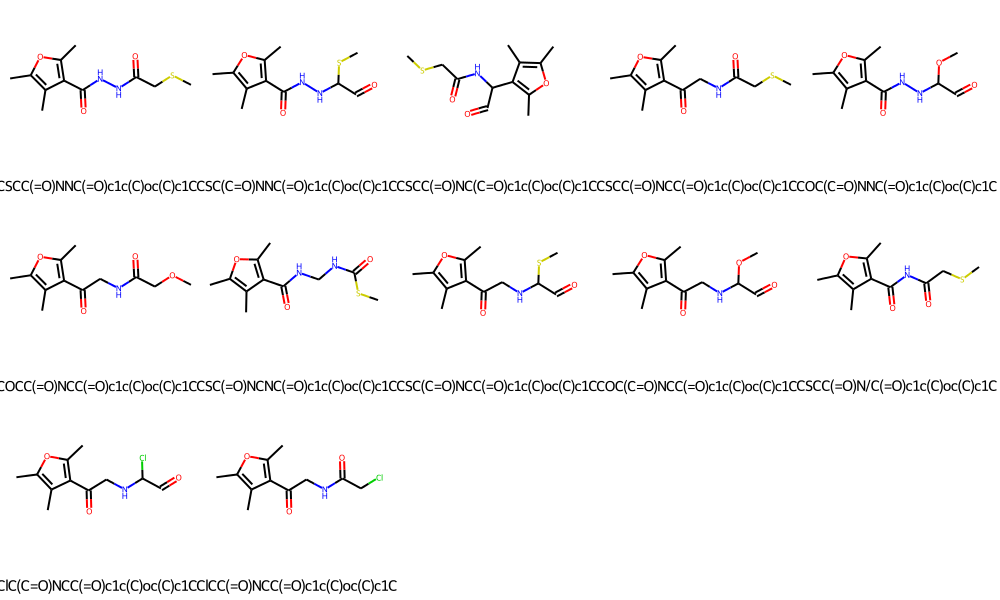

,smiles,distance,count,frequency,mol
0,CSCC(=O)NNC(=O)c1c(C)oc(C)c1C,0.000007,6,0.076923,"<img data-content=""rdkit/molecule"" src=""data:i..."
1,CSC(C=O)NNC(=O)c1c(C)oc(C)c1C,3.172575,8,0.102564,"<img data-content=""rdkit/molecule"" src=""data:i..."
2,CSCC(=O)NC(C=O)c1c(C)oc(C)c1C,3.522308,1,0.012821,"<img data-content=""rdkit/molecule"" src=""data:i..."
3,CSCC(=O)NCC(=O)c1c(C)oc(C)c1C,4.743192,26,0.333333,"<img data-content=""rdkit/molecule"" src=""data:i..."
4,COC(C=O)NNC(=O)c1c(C)oc(C)c1C,5.081088,1,0.012821,"<img data-content=""rdkit/molecule"" src=""data:i..."


In [7]:
noise=5.0
print('Searching molecules randomly sampled from {:.2f} std (z-distance) from the point'.format(noise))
df = vae.z_to_smiles( z_1,decode_attempts=100,noise_norm=noise)
print('Found {:d} unique mols, out of {:d}'.format(len(set(df['smiles'])),sum(df['count'])))
print('SMILES\n',df.smiles)
display(PandasTools.FrameToGridImage(df,column='mol', legendsCol='smiles',molsPerRow=5))
df.head()

## PCA of latent space

Sample random points from the training set along with properties

In [8]:
Z, data, smiles = vae.ls_sampler_w_prop(size=50000,return_smiles=True)
prop_opt = 'qed'
prop_df = pd.DataFrame(data).reset_index()
prop_df['smiles']=smiles
prop_df.head()

,index,logP,qed,SAS,smiles
0,216577,1.94942,0.887424,4.275398,Cc1n[nH]cc1C[NH2+]C[C@H]1CCCO[C@H]1c1ccccc1
1,138158,2.07760,0.792006,3.307158,CCC(CC)CNC(=O)N[C@@H]1CCC[C@@H](S(C)(=O)=O)C1
2,155866,2.72144,0.746237,3.336545,Cc1noc(C)c1[C@@H](C)CN[C@H](C)c1ccc(-n2cnnn2)cc1
3,201917,1.44880,0.874182,4.791294,C[NH+](Cc1ccc(C2=NC(=O)[C@H]3CSCC3=N2)cc1)Cc1n...
4,106752,2.60260,0.871958,2.356249,CSCc1cc(F)ccc1CNC(=O)N1CCC(CO)CC1


Perform a PCA projection and color the points based on a property

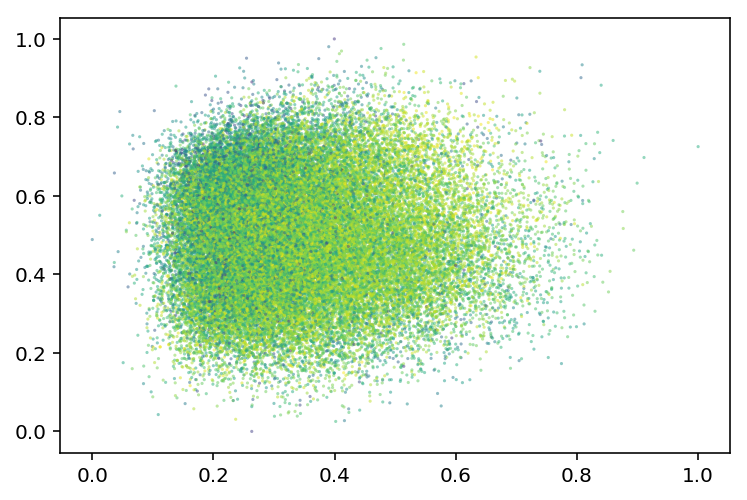

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# do pca and normalize
Z_pca = PCA(n_components=2).fit_transform(Z)
Z_pca = MinMaxScaler().fit_transform(Z_pca)

df = pd.DataFrame(np.transpose((Z_pca[:,0],Z_pca[:,1])))
df.columns = ['x','y']
df[prop_opt]=prop_df[prop_opt]

plt.scatter(x=df['x'], y=df['y'], c=df[prop_opt],
            cmap= 'viridis', marker='.',
            s=10,alpha=0.5, edgecolors='none')
plt.show()

compare with t-SNE, will take some time

In [ ]:
from sklearn.manifold import TSNE

Z_tsne = TSNE(n_components=2).fit_transform(Z)
Z_tsne = MinMaxScaler().fit_transform(Z_tsne)

f = pd.DataFrame(np.transpose((Z_tsne[:,0],Z_tsne[:,1])))
df.columns = ['x','y']
df[prop_opt]=prop_df[prop_opt]

plt.scatter(x=df['x'], y=df['y'], c=df[prop_opt],
            cmap= 'viridis', marker='.',
            s=10,alpha=0.5, edgecolors='none')
plt.show()